# **Modelling and Evaluation - Brain Tumor Detection**

## Objectives



## Inputs



## Outputs




## Comments/Conclusions

---

## Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

---

## Change Working Directory

In [8]:
cwd= os.getcwd()

In [9]:
os.chdir('/workspace/brain-tumor-detection')
print("You set a new current directory")

You set a new current directory


In [10]:
work_dir = os.getcwd()
work_dir

'/workspace/brain-tumor-detection'

---

## Set Input Directories

Set train, validation and test paths

In [11]:
my_data_dir = 'inputs/mriscans_dataset/mri-scans'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set Output Directory

In [12]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set Label Names

In [13]:
labels = os.listdir(train_path)

print(f"Project Labels: {labels}")

Project Labels: ['healthy', 'tumor']


## Set Image Shape

In [14]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(355, 334, 3)

---

## Images Distribution

### Count Number of Images for Train, Test and Validation and Number of Images for Healthy & Tumor Scan Results

In [18]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(
                data={
                    'Set': folder,
                    'Label': label,
                    'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                        ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images"
            )

print("\n")

# Create and print the frequency of images used (healthy & tumor)
total_mriscan_label_distribution = df_freq.groupby('Label')['Frequency'].sum()

dataset_weight = "Total dataset weight:\n"

for label, count in total_mriscan_label_distribution.items():
    dataset_weight += f"MRI Scan Result Label - {label}: {int(count)} images\n"

print(dataset_weight)

print("\n")

* train - healthy: 1345 images
* train - tumor: 1251 images
* validation - healthy: 192 images
* validation - tumor: 178 images
* test - healthy: 385 images
* test - tumor: 359 images


Total dataset weight:
MRI Scan Result Label - healthy: 1922 images
MRI Scan Result Label - tumor: 1788 images





### Bar Chart - Distribution of Images for Train, Test and Validation

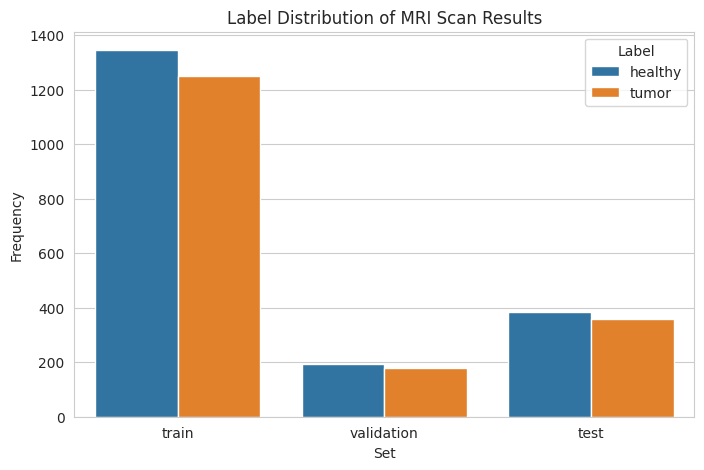

In [27]:
# Create & Save Bar Chart 
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label').set(title='Label Distribution of MRI Scan Results')

plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)

plt.show()